In [1]:
from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.losses import DiceLoss 

import torch

import train_model
import test_model

### Model definition

In [2]:
# Data used: http://medicaldecathlon.com/ 

data_path = './data'
model_path = './results/5P_1000E_128px'
max_epochs = 1000

img_size = 128

device = torch.device('cpu') # CPU used: AMD Ryzen 2600 

model = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=2,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2, 
    norm=Norm.BATCH
).to(device)

loss_function = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
optimizer = torch.optim.Adam(model.parameters(), 1e-5, weight_decay=1e-5, amsgrad=True)

### Data preparation

In [3]:
train_loader, test_loader = train_model.prepare(data_path, img_size)

### Training the model

In [ ]:
train_model.train(train_loader, test_loader, model, max_epochs, device, optimizer, loss_function, model_path)

### Testing the model

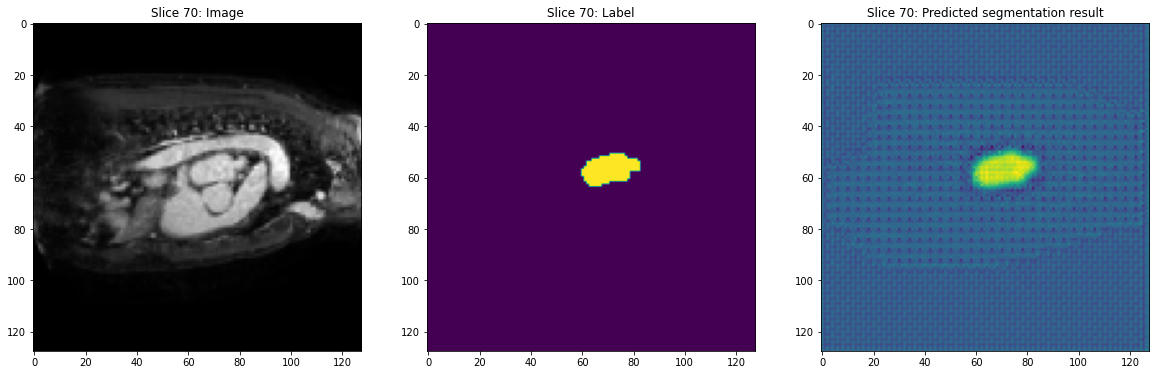

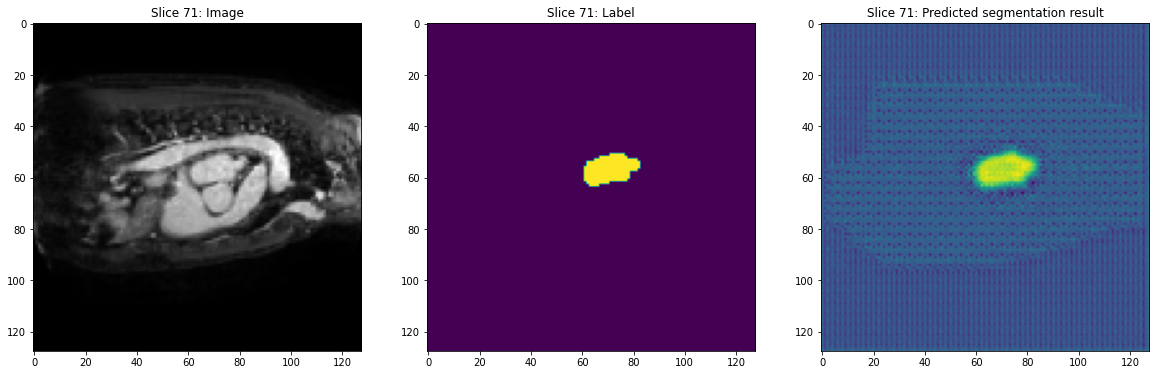

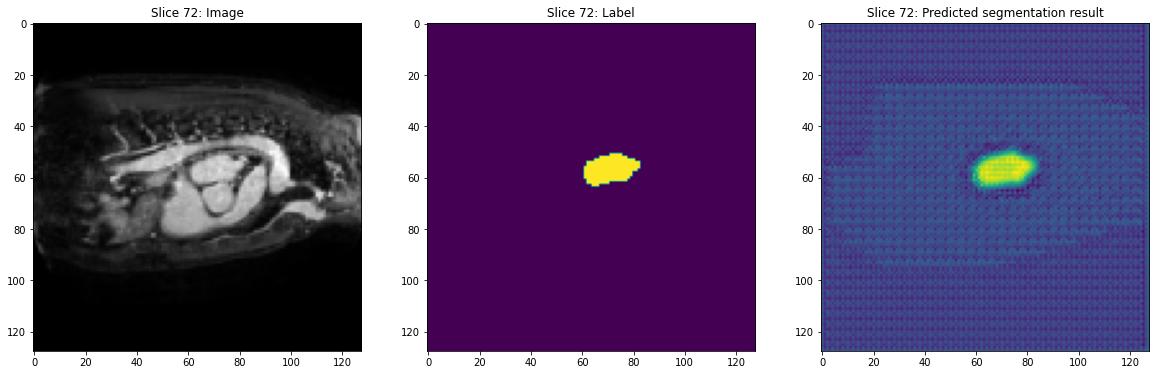

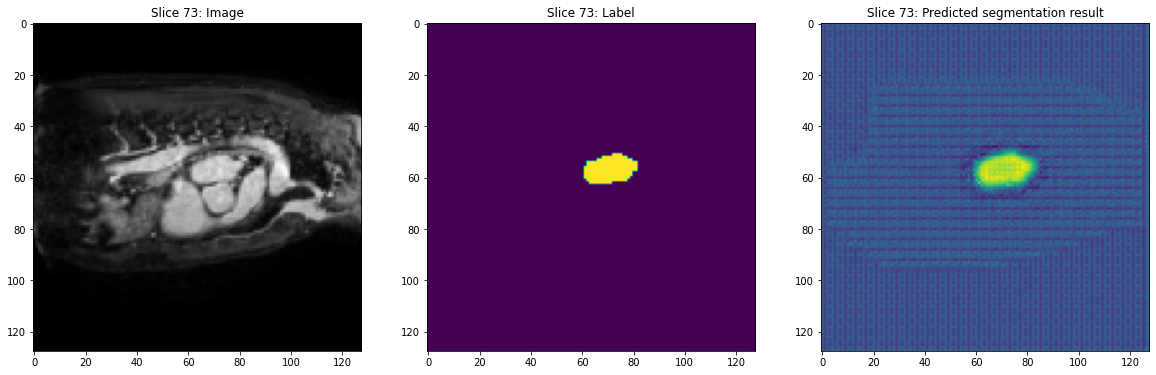

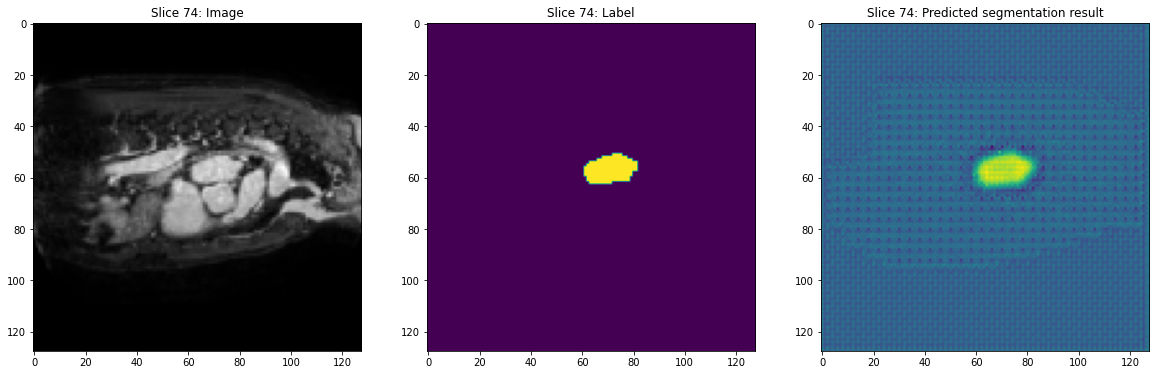

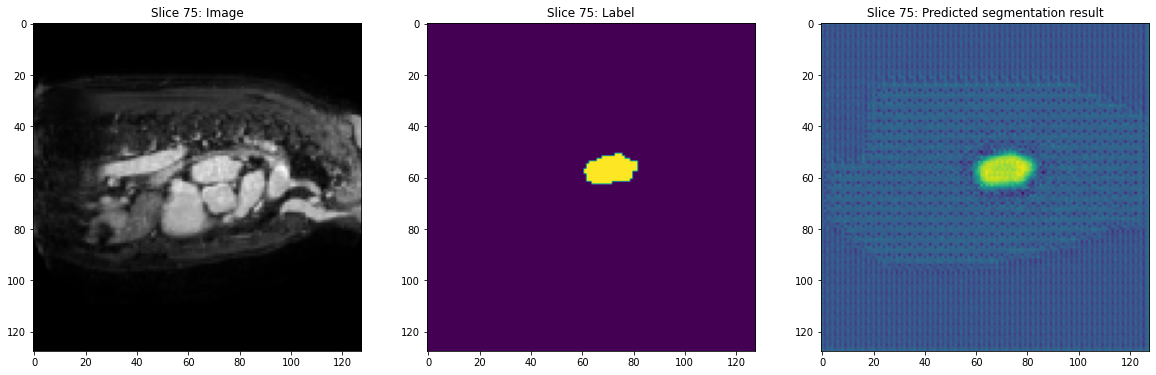

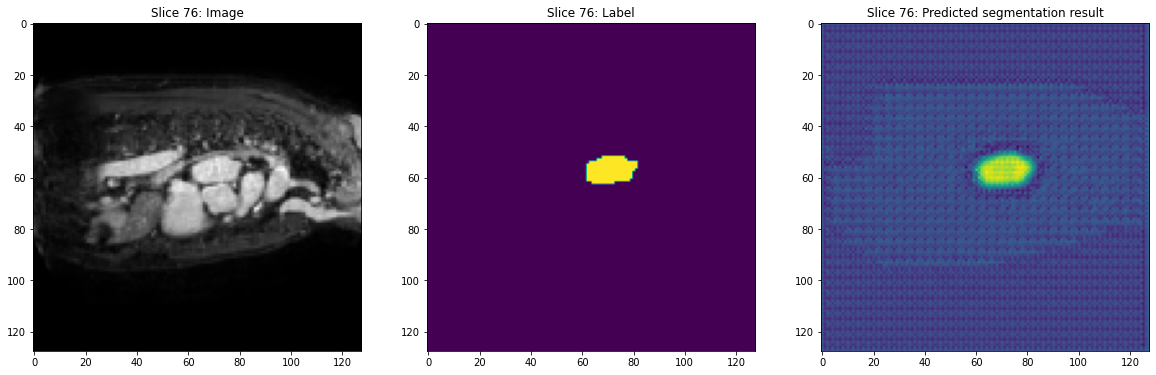

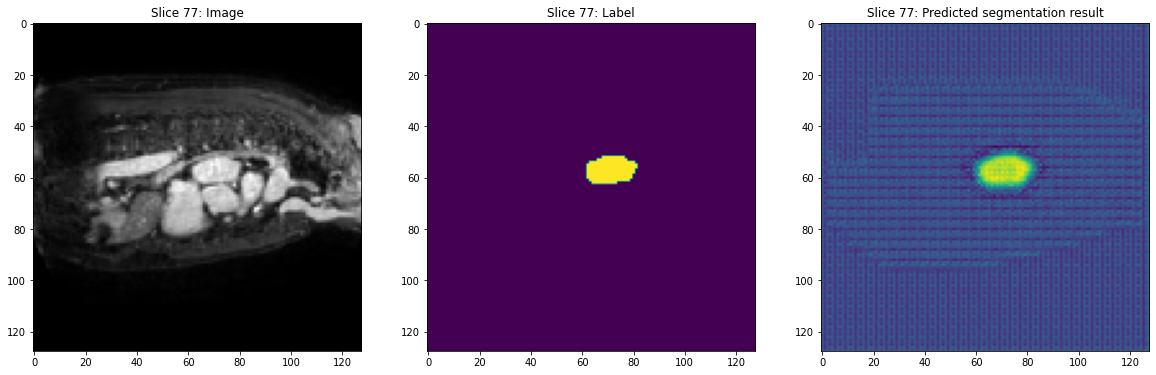

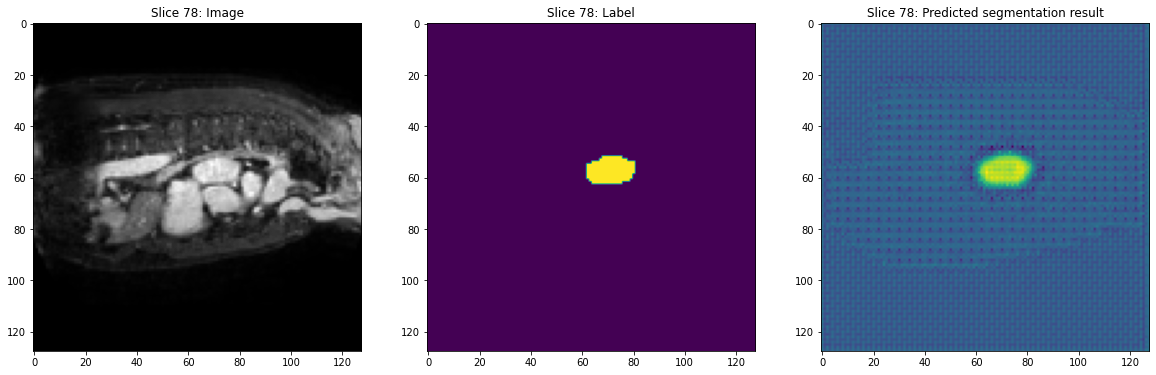

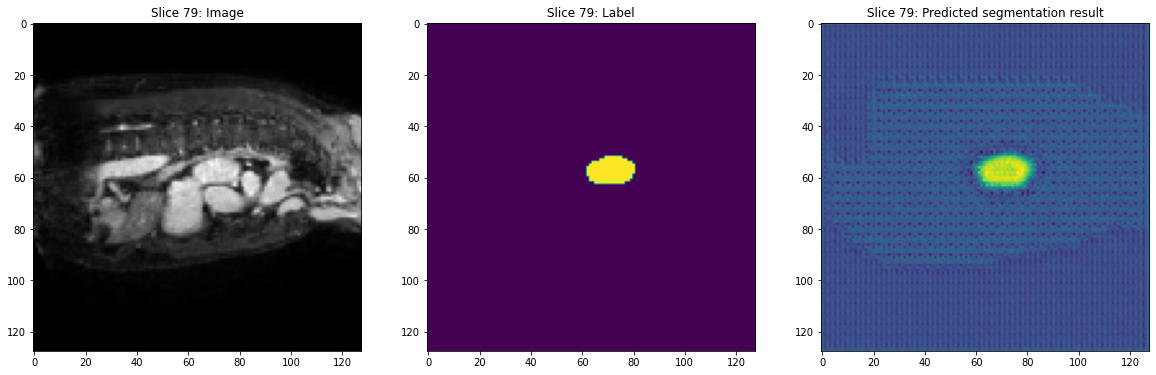

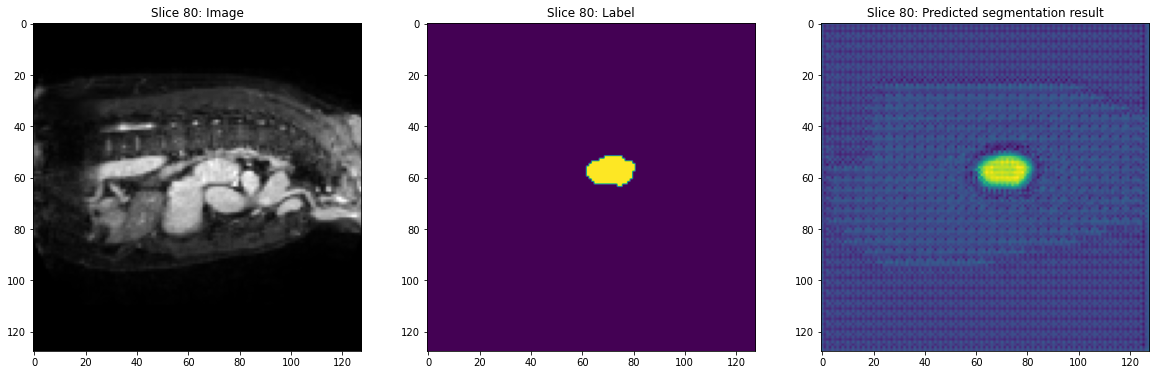

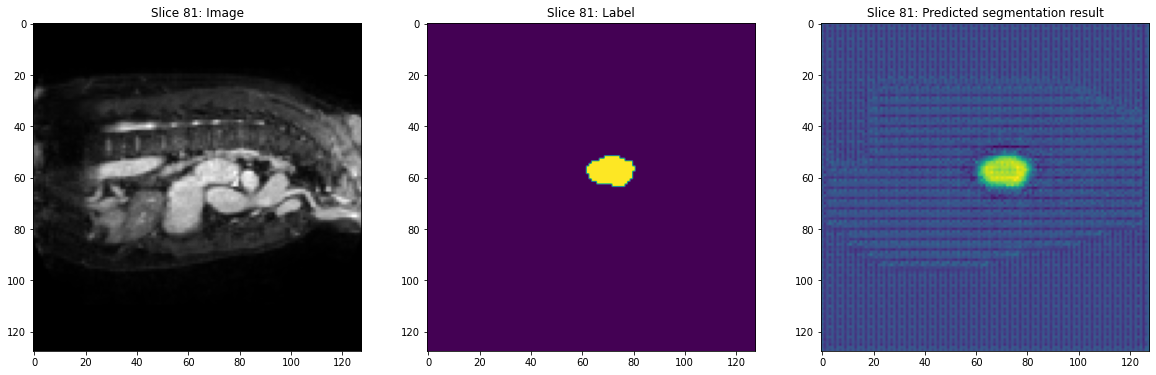

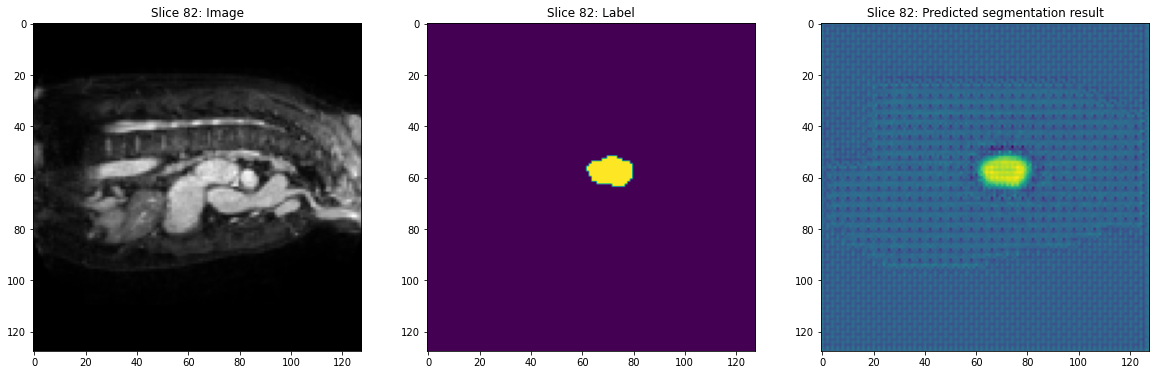

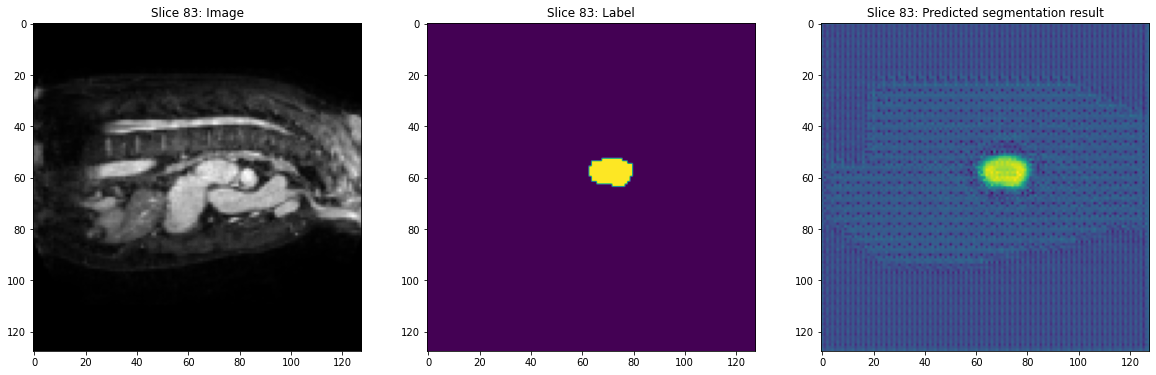

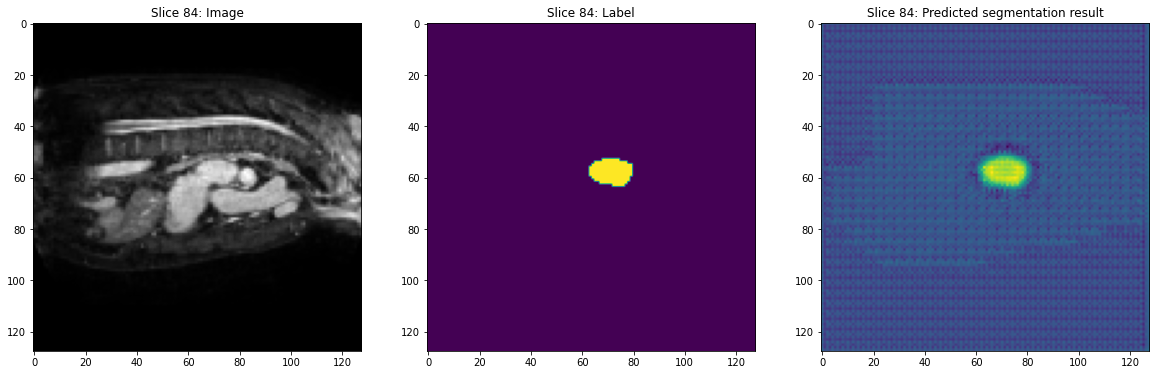

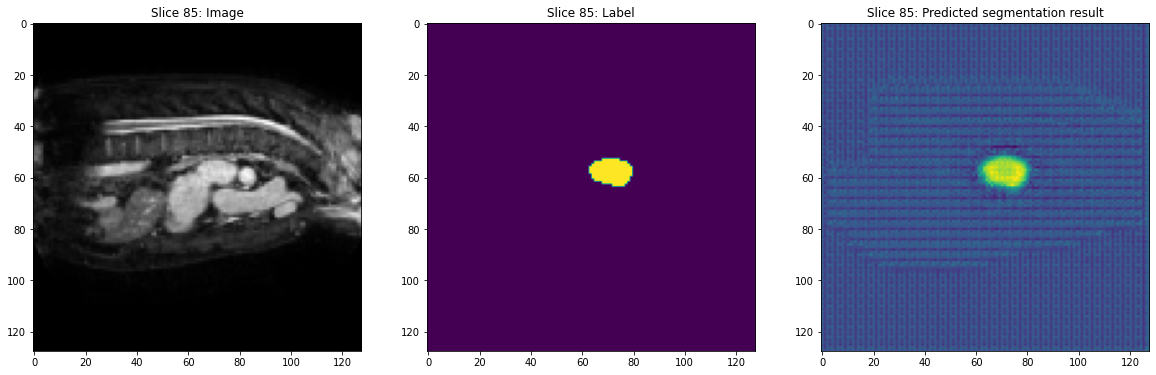

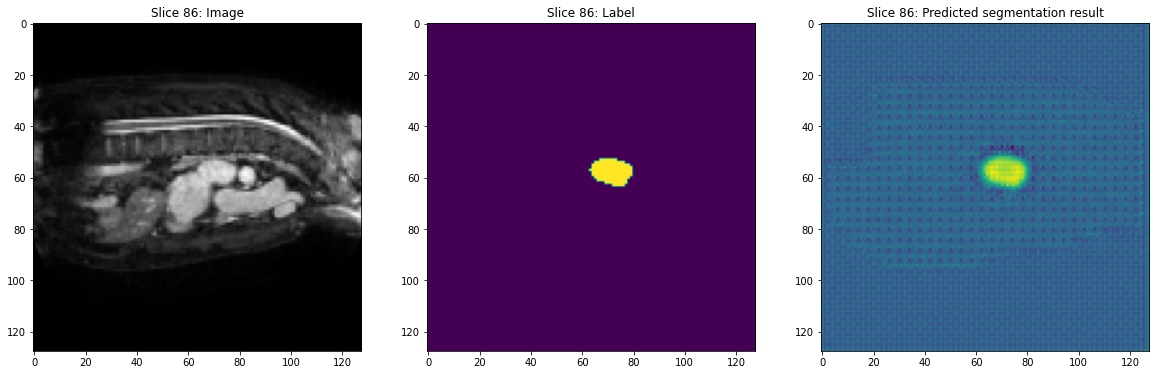

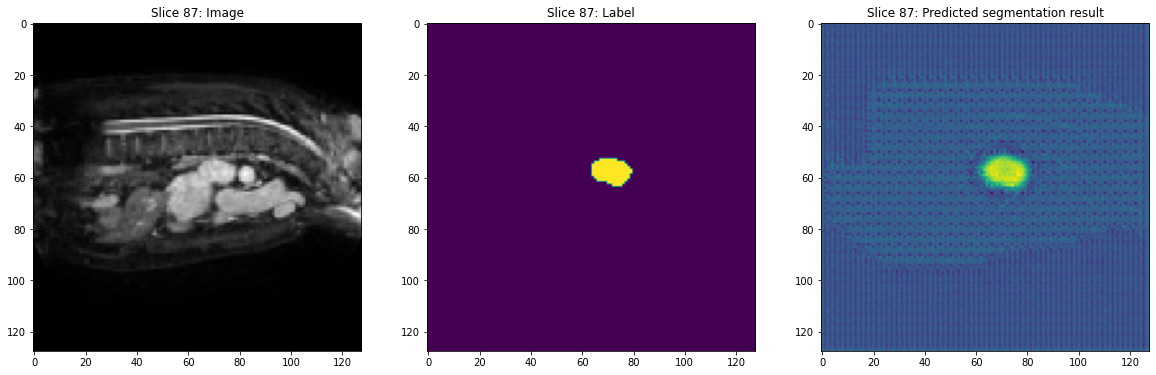

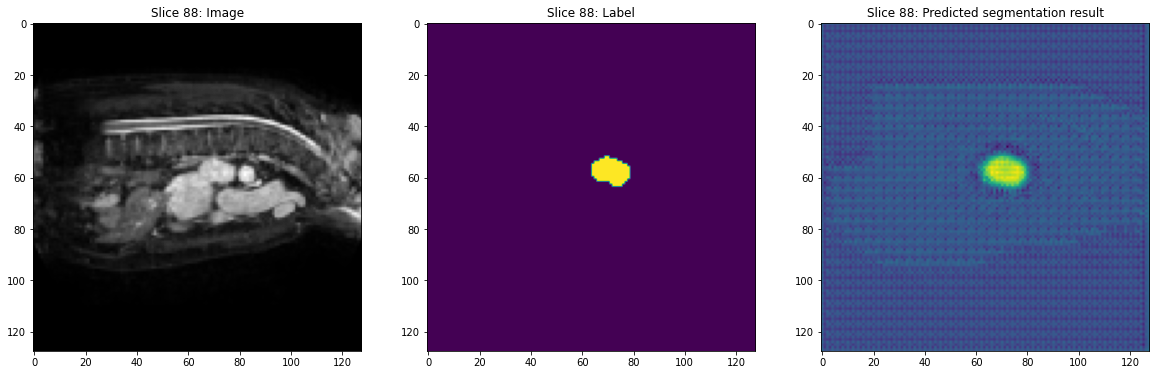

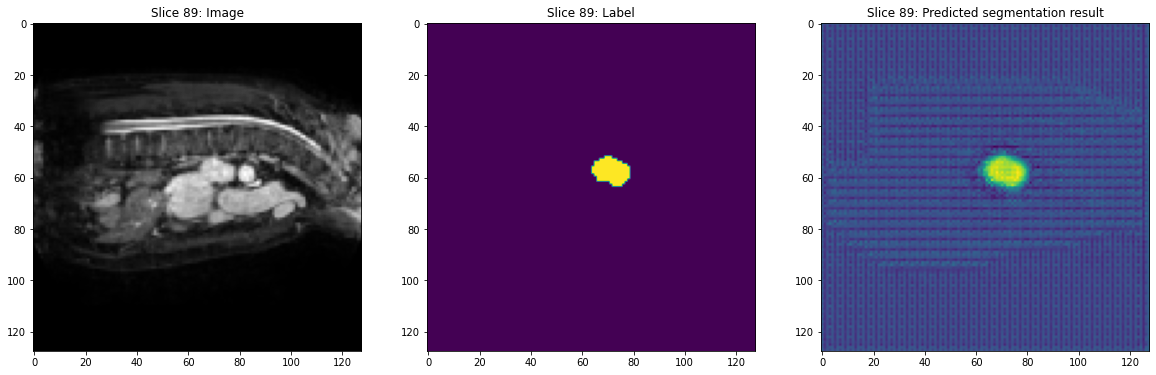

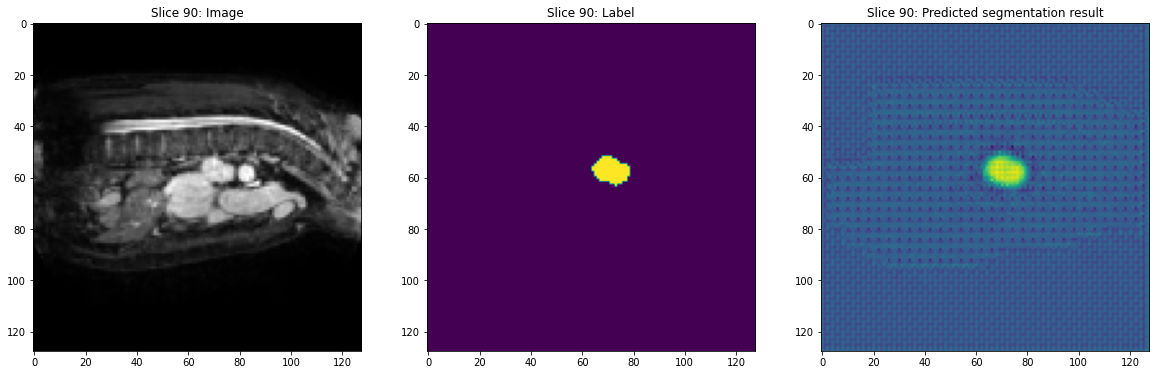

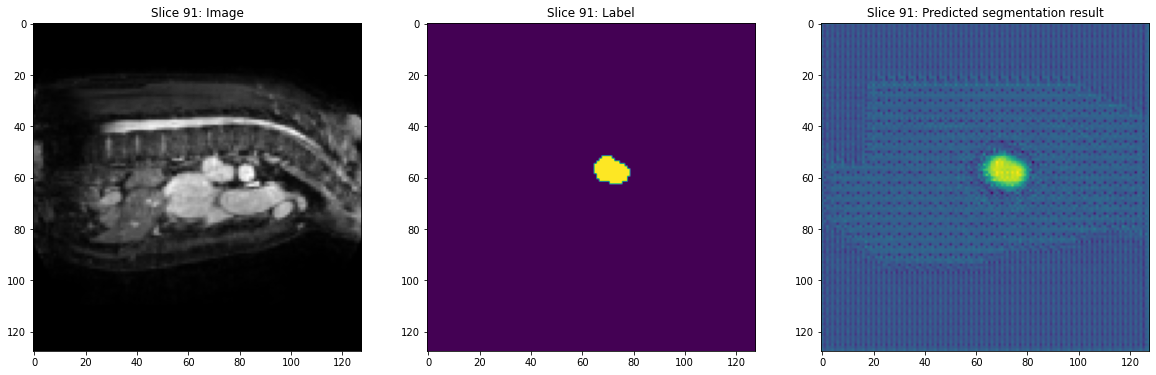

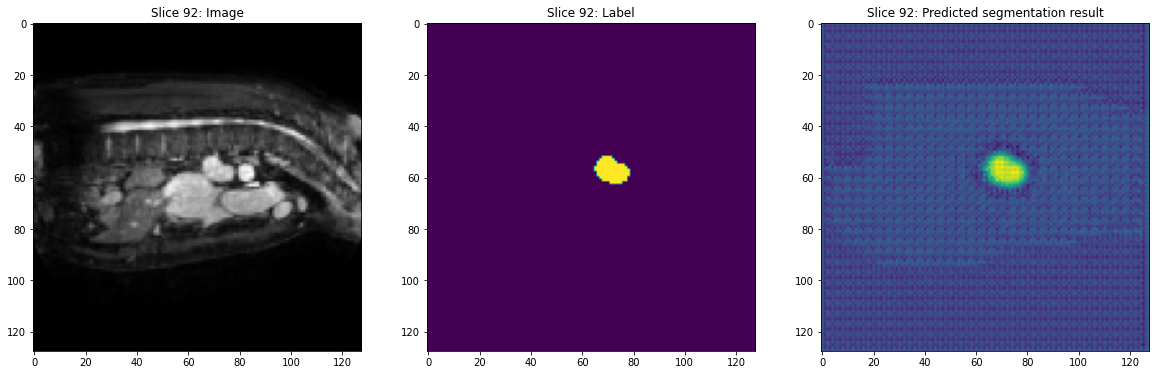

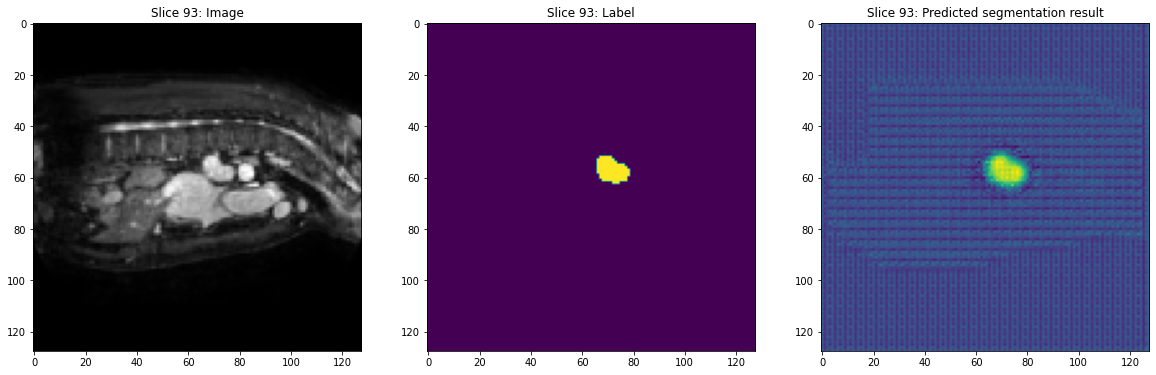

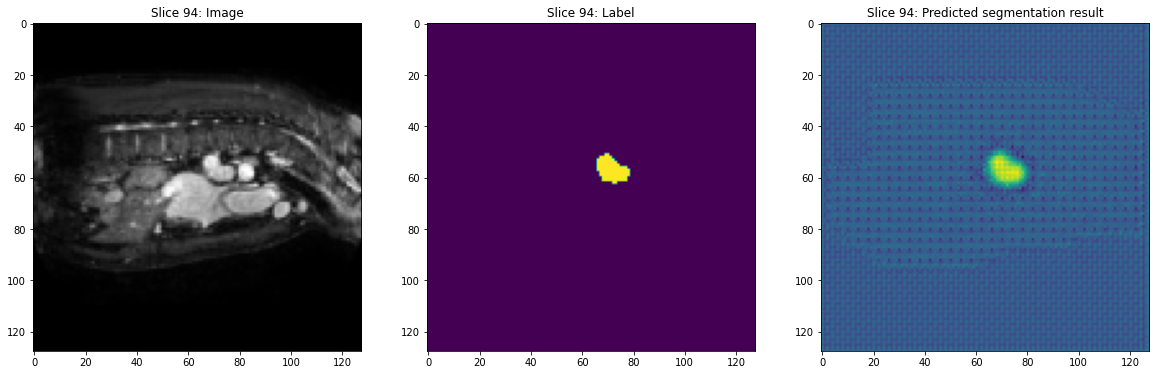

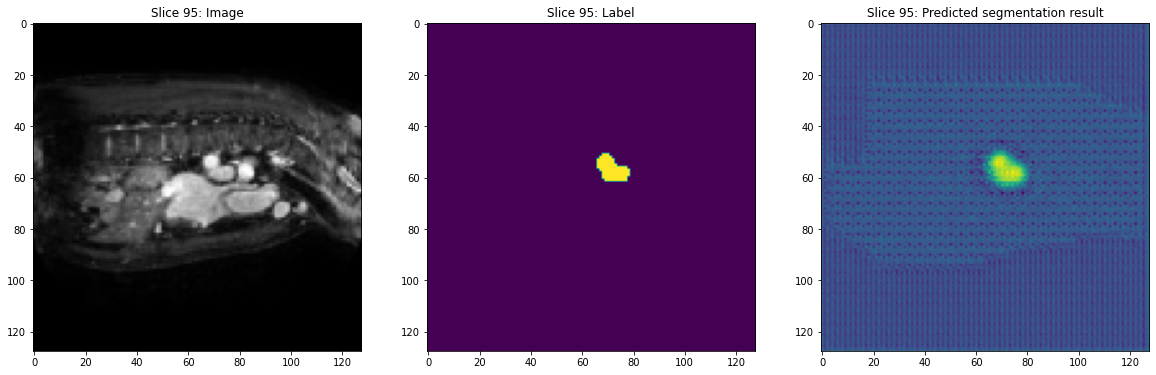

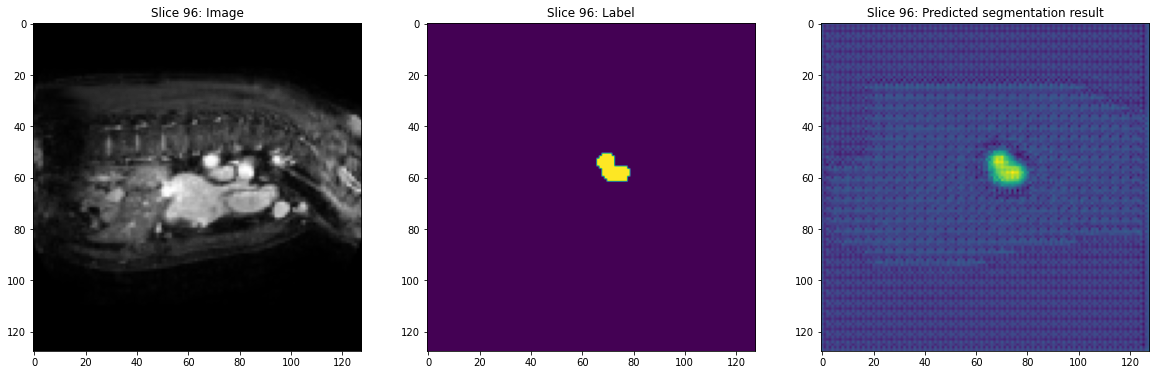

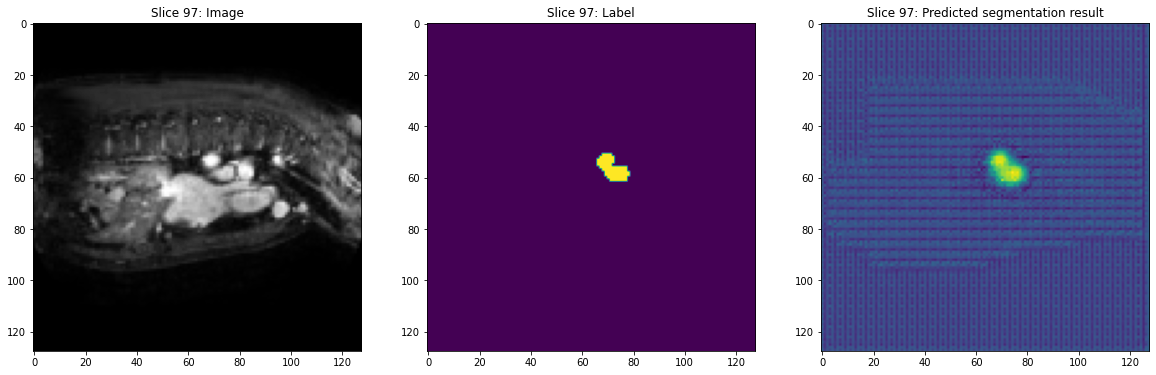

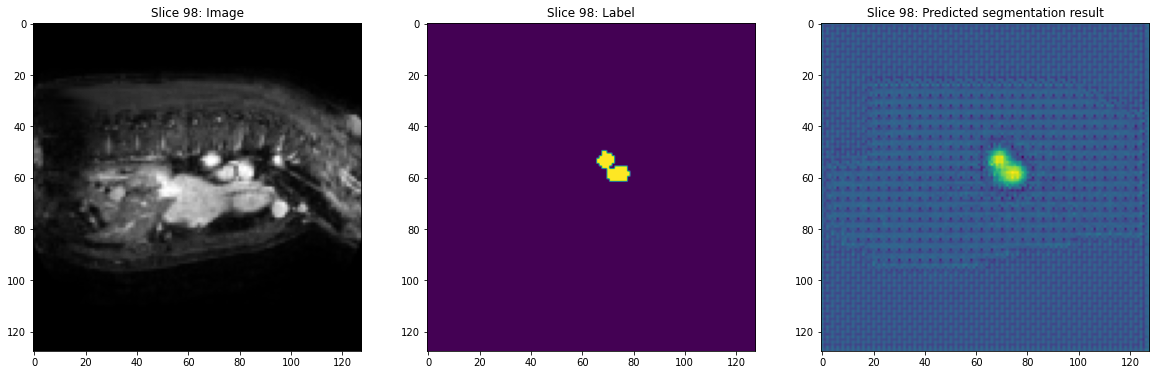

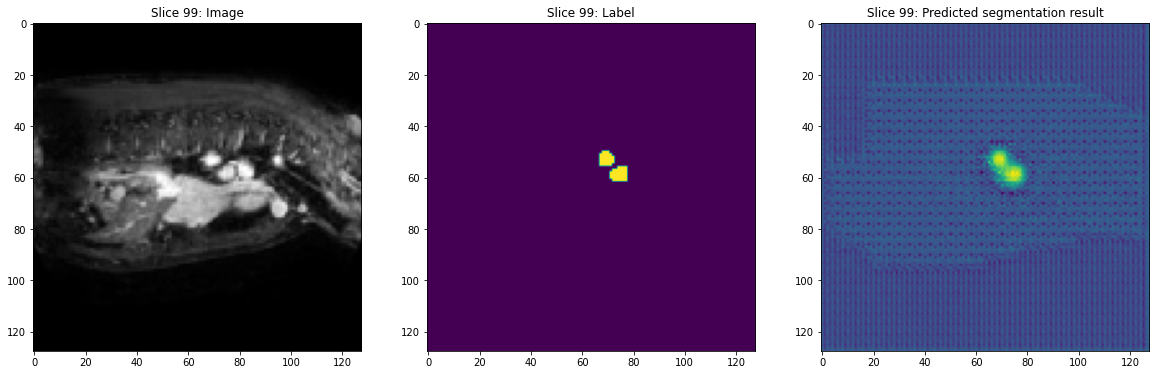

In [5]:
test_model.test(test_loader, model, model_path, img_size, device, s_min=70, s_max=100)

### Achieved segmentation metrics

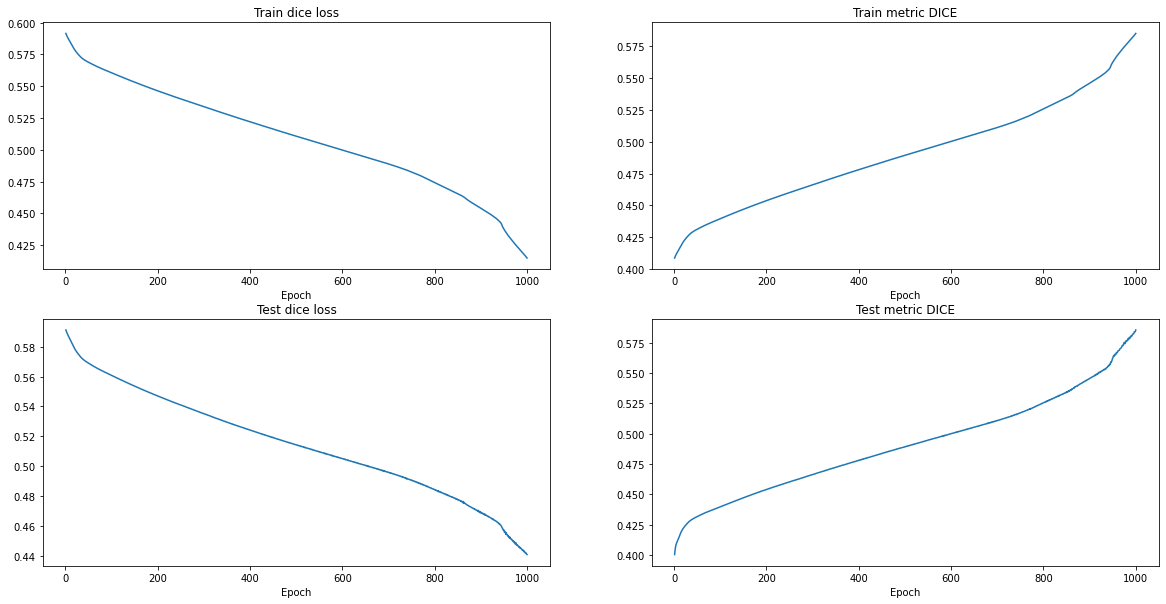

In [6]:
test_model.show_stats(model_path) 